# 🏚️ House Price Prediction
**Dataset**: [🏚️House Price Prediction](https://www.kaggle.com/datasets/wardabilal/real-estate-price-insights/data)

### **Business Probems:**
- Inaccurate Property Valuations Leading to Lost Revenue or Overpayment
- Inefficient Investment Decisions for  Real estate investors to identify  the high-potential properties in competitive markets
- Governments and tax authorities need to value millions of properties.so manual processes are costly and slow
- Banks and mortgage lenders face risks to identify the real property values to lend their money 
### **Beneficeries:**
* Banks and Money Lenders
* Governments and tax authorities 
* Real Estate Companys







## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost
from xgboost import XGBRegressor
from  lightgbm import LGBMRegressor
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
import umap
from umap import UMAP

In [2]:
#Loading the Data
df=pd.read_csv(r'F:\Project\Hosue price Prediction\New folder (2)\Housing_Price_Data.csv')
print('✅ Dataset loaded sucessfully')
print(f'shape :{df.shape[0]} Rows x {df.shape[1]} Columns')
print('='*80)
print(df)

✅ Dataset loaded sucessfully
shape :545 Rows x 13 Columns
        price  area  bedrooms  bathrooms  stories Main road guestroom  \
0    13300000  7420         4          2        3       yes        no   
1    12250000  8960         4          4        4       yes        no   
2    12250000  9960         3          2        2       yes        no   
3    12215000  7500         4          2        2       yes        no   
4    11410000  7420         4          1        2       yes       yes   
..        ...   ...       ...        ...      ...       ...       ...   
540   1820000  3000         2          1        1       yes        no   
541   1767150  2400         3          1        1        no        no   
542   1750000  3620         2          1        1       yes        no   
543   1750000  2910         3          1        1        no        no   
544   1750000  3850         3          1        2       yes        no   

    basement Hot water heating Airconditioning  parking Preferred

## Initial Data Inspection 

In [3]:
#Data informataion and statistical summary
print('='*50)
print(' Data Information')
print('='*50)
print(df.info())
print('='*80)
print(' Statistical Summary')
print('='*80)
print(df.describe())

 Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              545 non-null    int64 
 1   area               545 non-null    int64 
 2   bedrooms           545 non-null    int64 
 3   bathrooms          545 non-null    int64 
 4   stories            545 non-null    int64 
 5   Main road          545 non-null    object
 6   guestroom          545 non-null    object
 7   basement           545 non-null    object
 8   Hot water heating  545 non-null    object
 9   Airconditioning    545 non-null    object
 10  parking            545 non-null    int64 
 11  Preferred area     545 non-null    object
 12  Furnishing status  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
 Statistical Summary
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02   

## Data Quality Assesment

In [4]:
#checking for missing values and duplicate values
print('\n 🔍Missing values:')
Missing=df.isnull().sum()
if Missing.sum()==0:
    print('✔️No Missing vallues in the dataset')
else:
    print(f'Missing values : {Missing}')
print('='*50)
print('🔍duplicate values:')
Duplicate=df.duplicated().sum()
if Duplicate==0:
    print('✔️No Duplicate values in the dataset')
else:
    print(f'Duplicate  values : {Missing}')

print('='*50)
print (' Data Types:')
print(df.dtypes)



 🔍Missing values:
✔️No Missing vallues in the dataset
🔍duplicate values:
✔️No Duplicate values in the dataset
 Data Types:
price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
Main road            object
guestroom            object
basement             object
Hot water heating    object
Airconditioning      object
parking               int64
Preferred area       object
Furnishing status    object
dtype: object


## EDA

In [5]:
# list the numerical and categorical columns
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['Main road', 'guestroom', 'basement', 'Hot water heating', 'Airconditioning', 'Preferred area', 'Furnishing status']

## Univariate Analysis

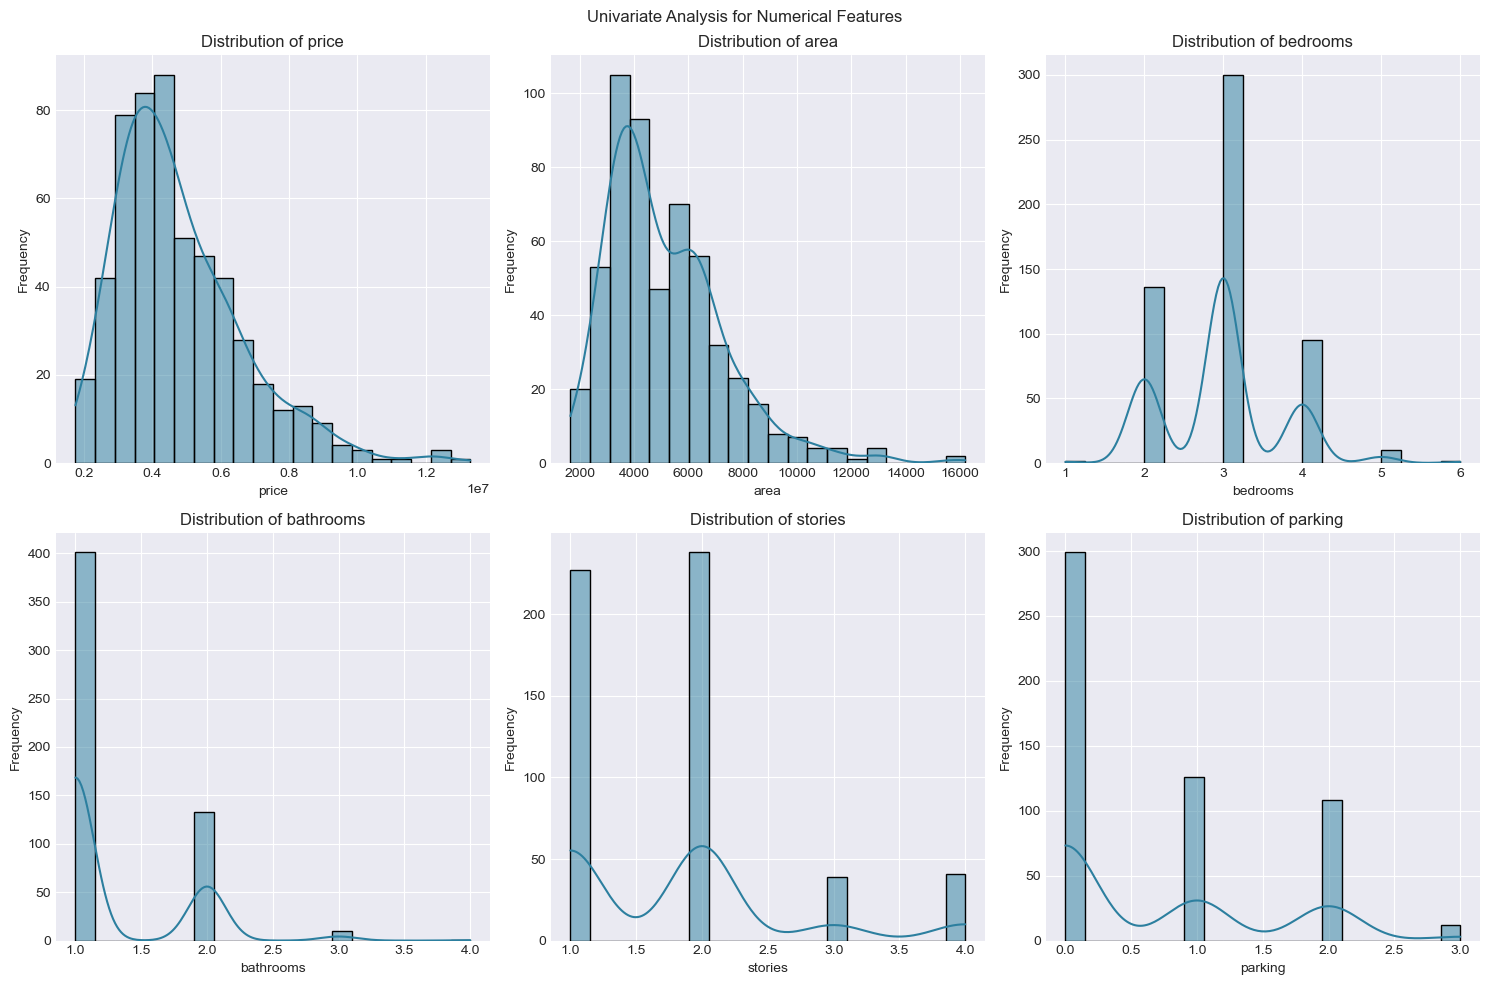

In [6]:
# 1. Univariate Analysis - Distributions of Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20,color="#2C7F9F")
    plt.title(f'Distribution of {col}')
    plt.suptitle('Univariate Analysis for Numerical Features')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

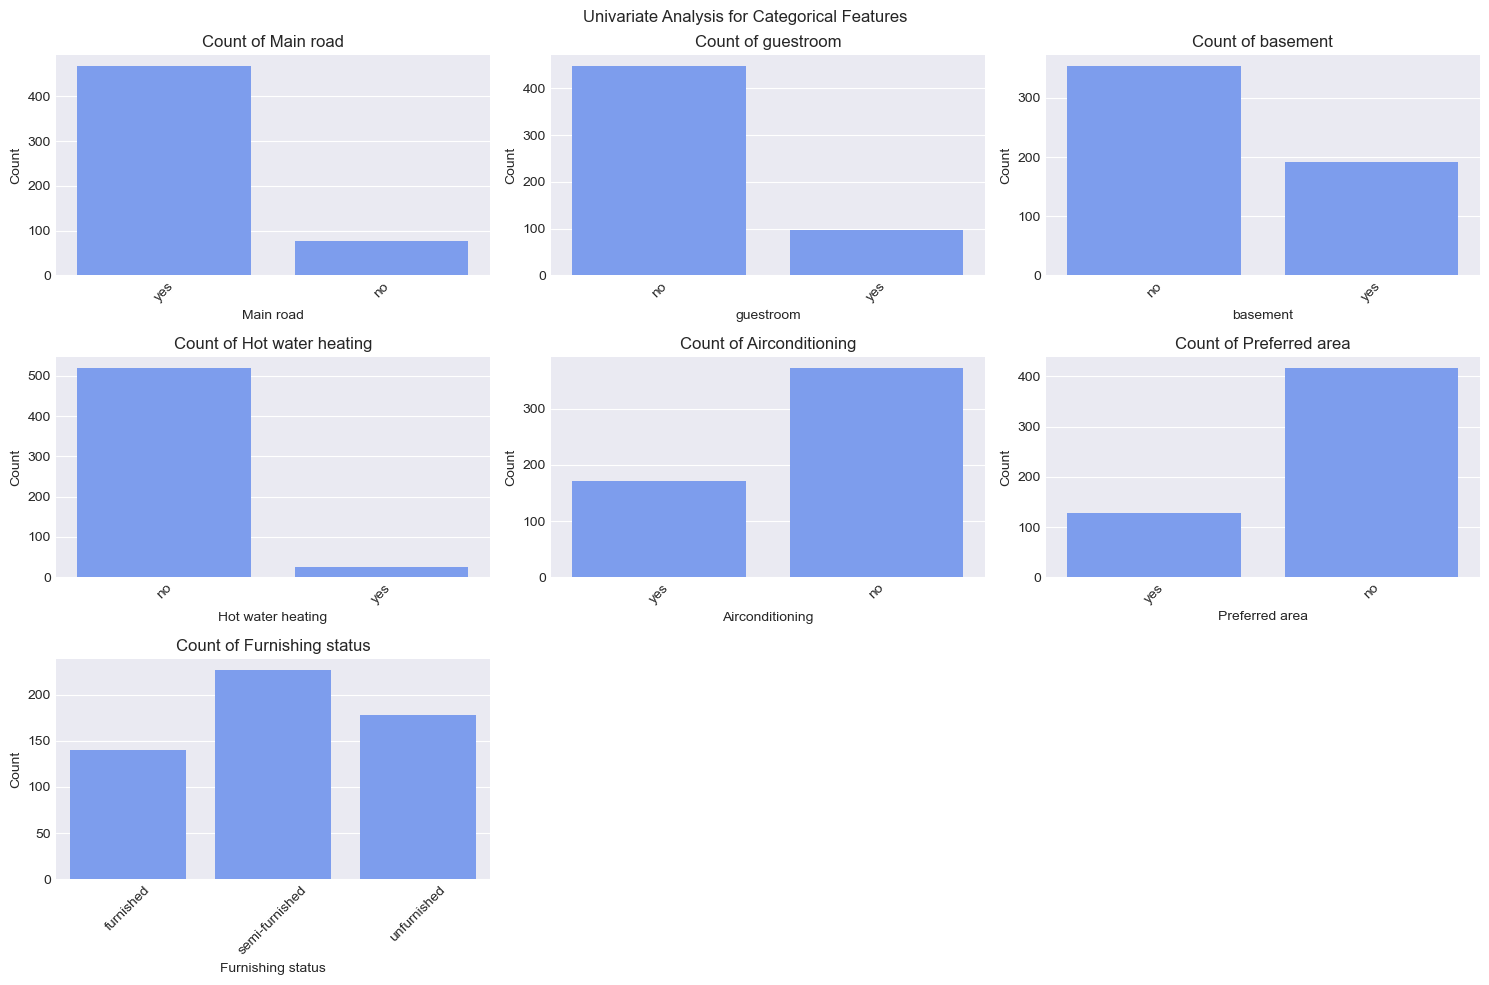

In [7]:
# 2. Univariate Analysis - Count Plots for Categorical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col],color="#6B95FF")
    plt.title(f'Count of {col}',fontsize=12)
    plt.suptitle('Univariate Analysis for Categorical Features')
    plt.xlabel(col,fontsize=10)
    plt.ylabel('Count',fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Analysis

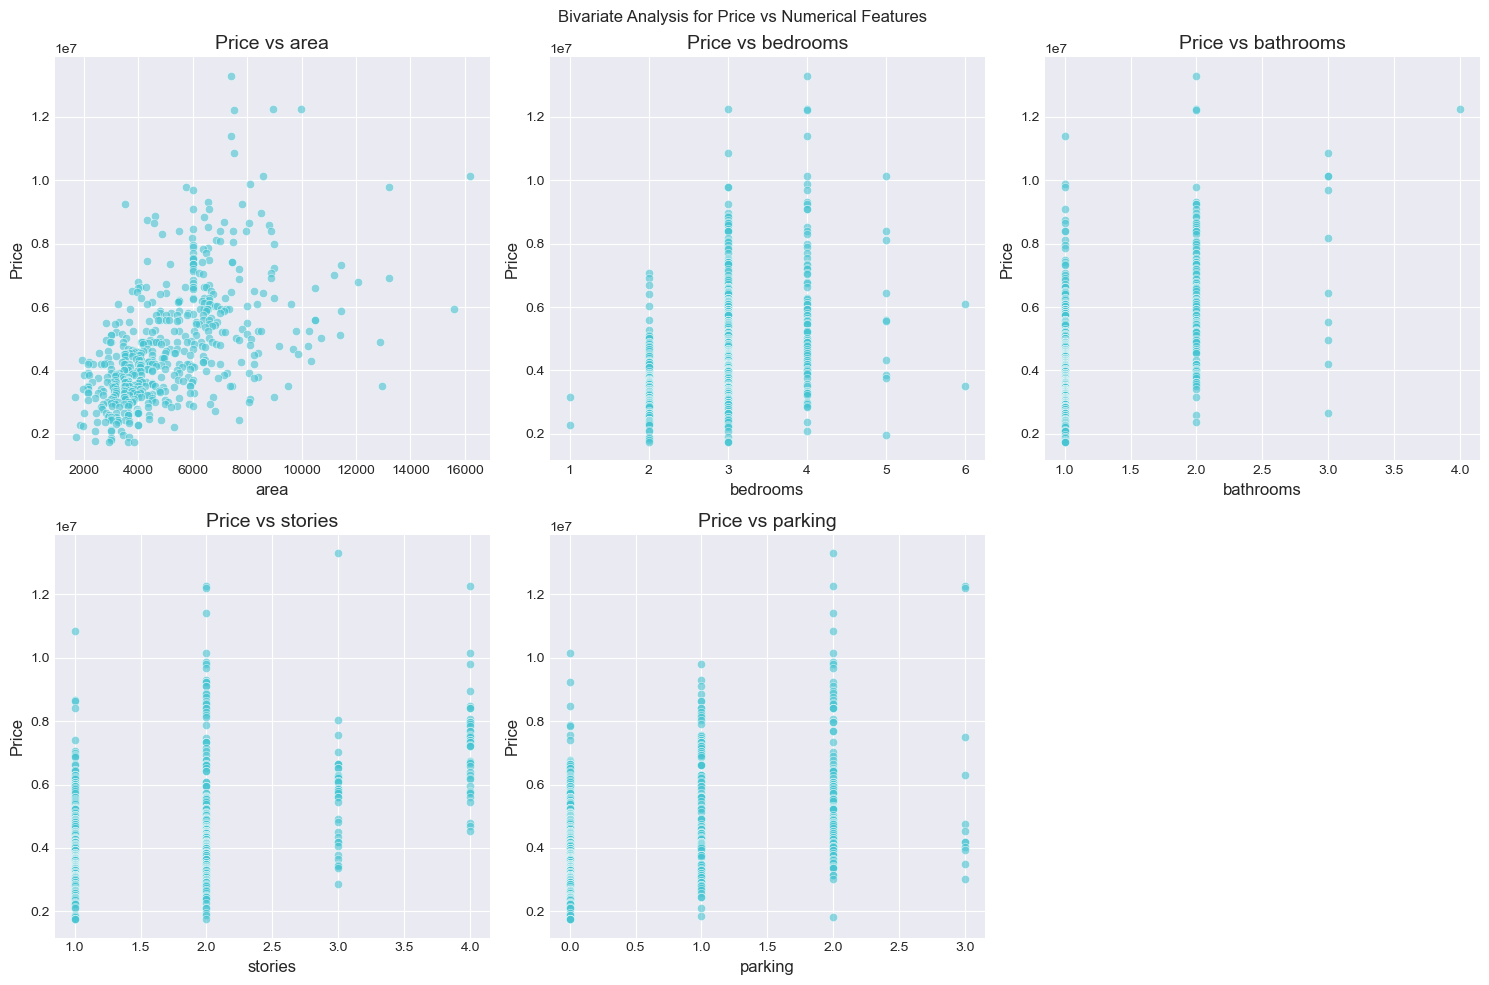

In [8]:
# 1. Bivariate Analysis - Scatter Plots (Price vs Numerical Features)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[1:], 1):  # Exclude price itself
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['price'], alpha=0.6,color="#47C4D2")
    plt.title(f'Price vs {col}',fontsize=14)
    plt.suptitle('Bivariate Analysis for Price vs Numerical Features ')
    plt.xlabel(col,fontsize=12)
    plt.ylabel('Price',fontsize=12)
plt.tight_layout()
plt.show()

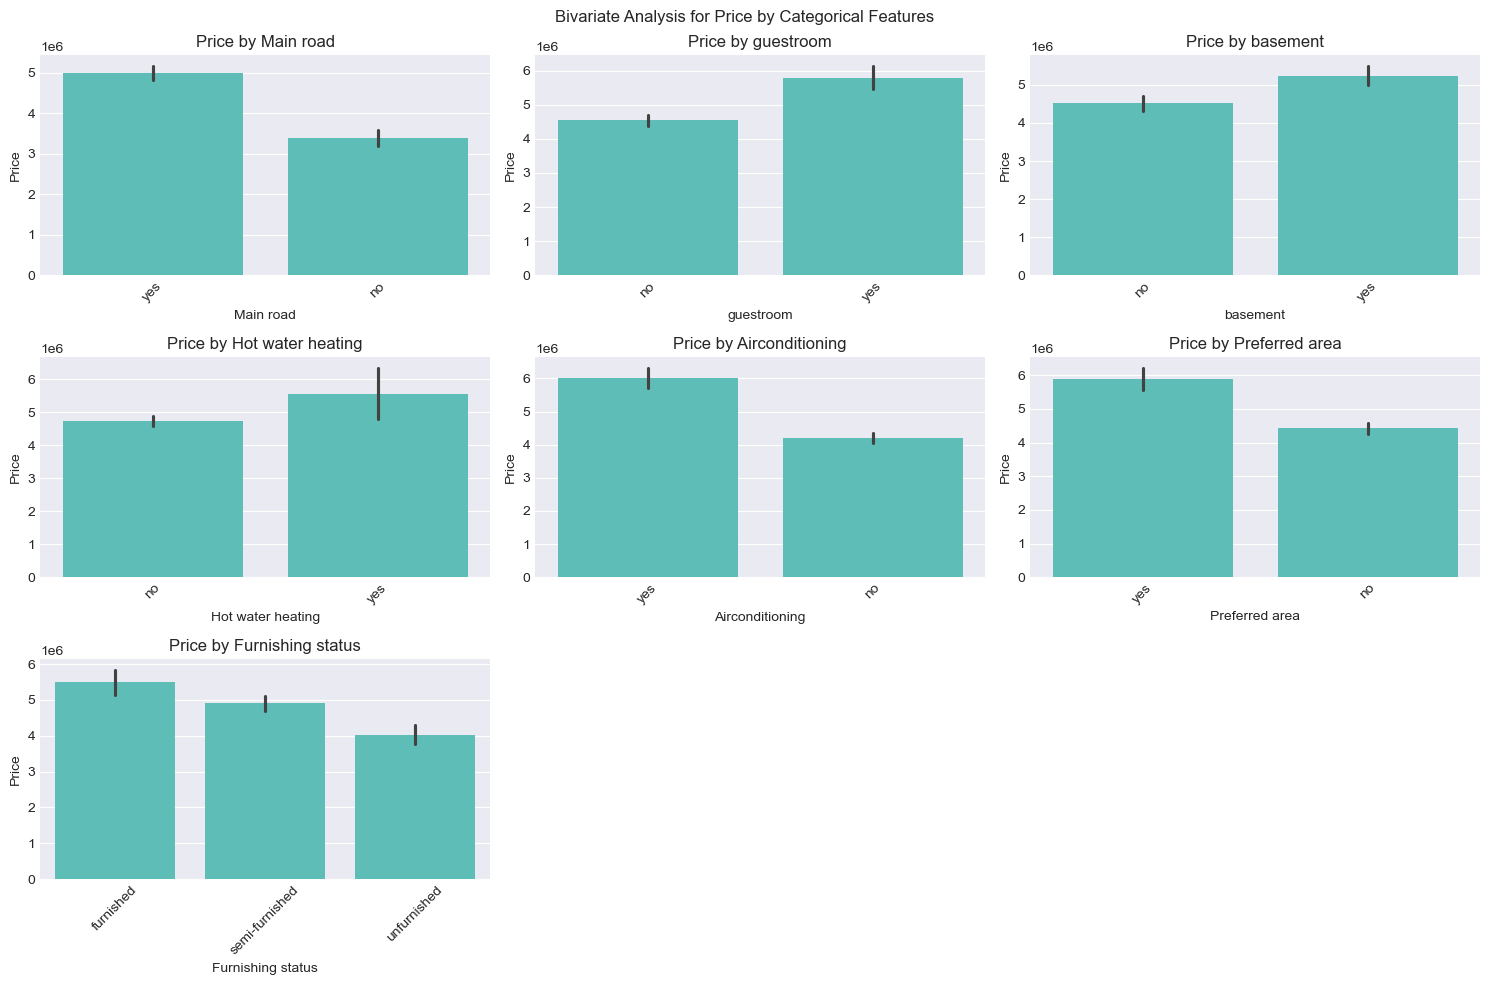

In [9]:
# 2. Bivariate Analysis - Box Plots (Price by Categorical Features)
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=df[col], y=df['price'],color='#4ECDC4')
    plt.title(f'Price by {col}')
    plt.suptitle('Bivariate Analysis for Price by Categorical Features')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Handle categorical variables: Assume binary categories like 'yes'/'no' for object types except furnishingstatus
binary_cols = ['Main road', 'guestroom', 'basement', 'Hot water heating', 'Airconditioning', 'Preferred area']
for col in binary_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].map({'yes': 1, 'no': 0})

## Numerical Analysis

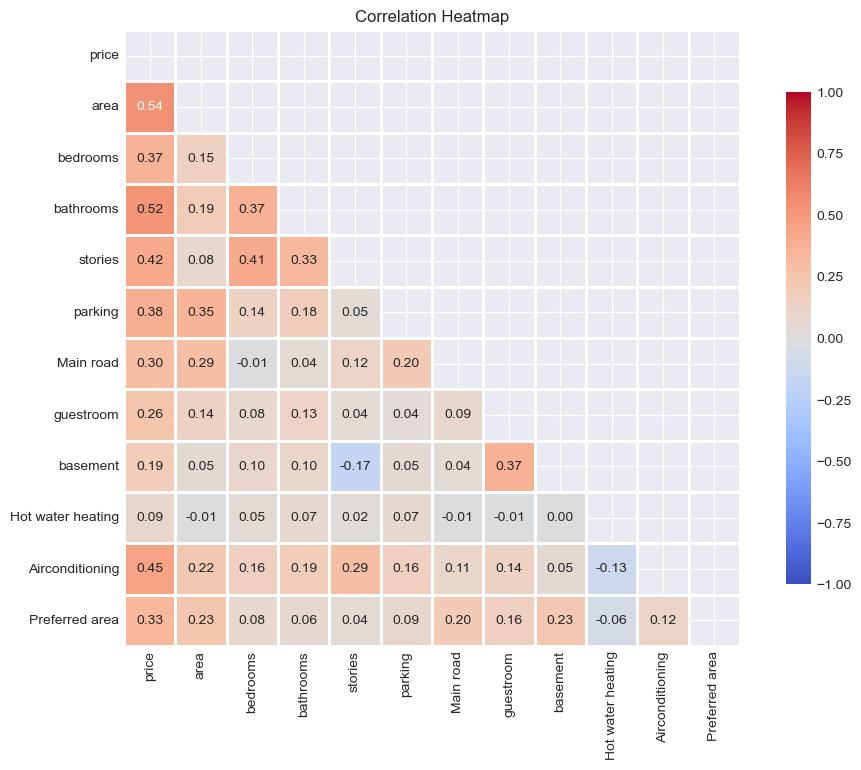

In [11]:
# 5. Correlation Heatmap (For numerical and binary encoded features)
# Select only numerical and binary columns for correlation
corr_cols = numerical_cols + binary_cols
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix , dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

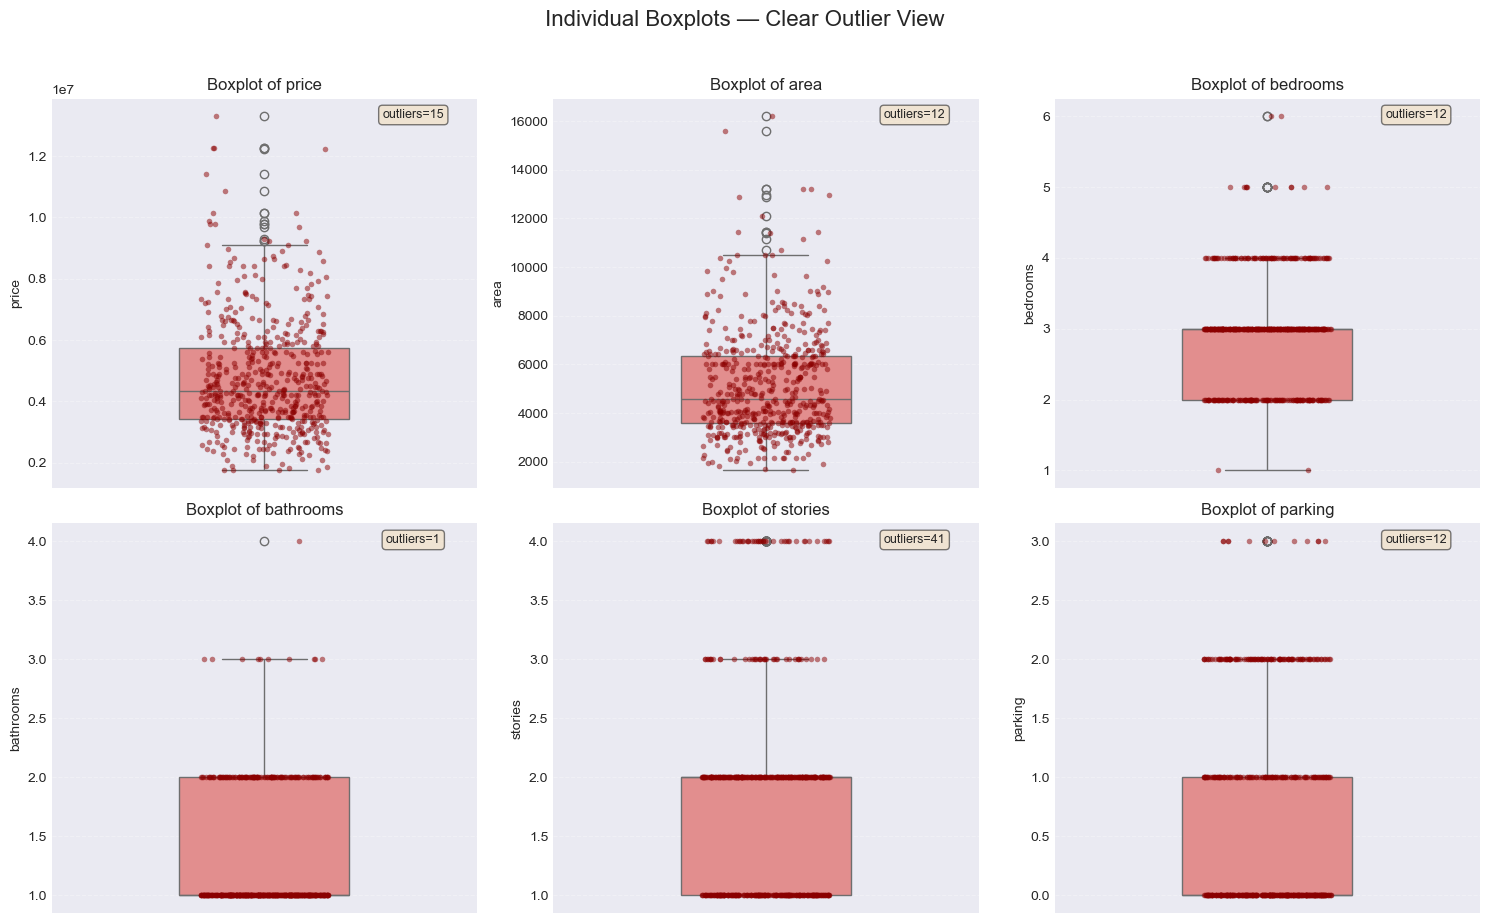

In [12]:
# Box plot for identifying outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral', width=0.4)
    sns.stripplot(y=df[col], ax=axes[i], color='darkred', alpha=0.5, size=4, jitter=0.15)
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    outliers=((df[col]<(q1-1.5*iqr))|(df[col]>(q3+1.5*iqr))).sum()
    axes[i].text(0.85,0.95,f'outliers={outliers}',transform=axes[i].transAxes,ha='center',fontsize=9,bbox=dict(boxstyle='round',facecolor='wheat',alpha=0.5))
plt.suptitle("Individual Boxplots — Clear Outlier View", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

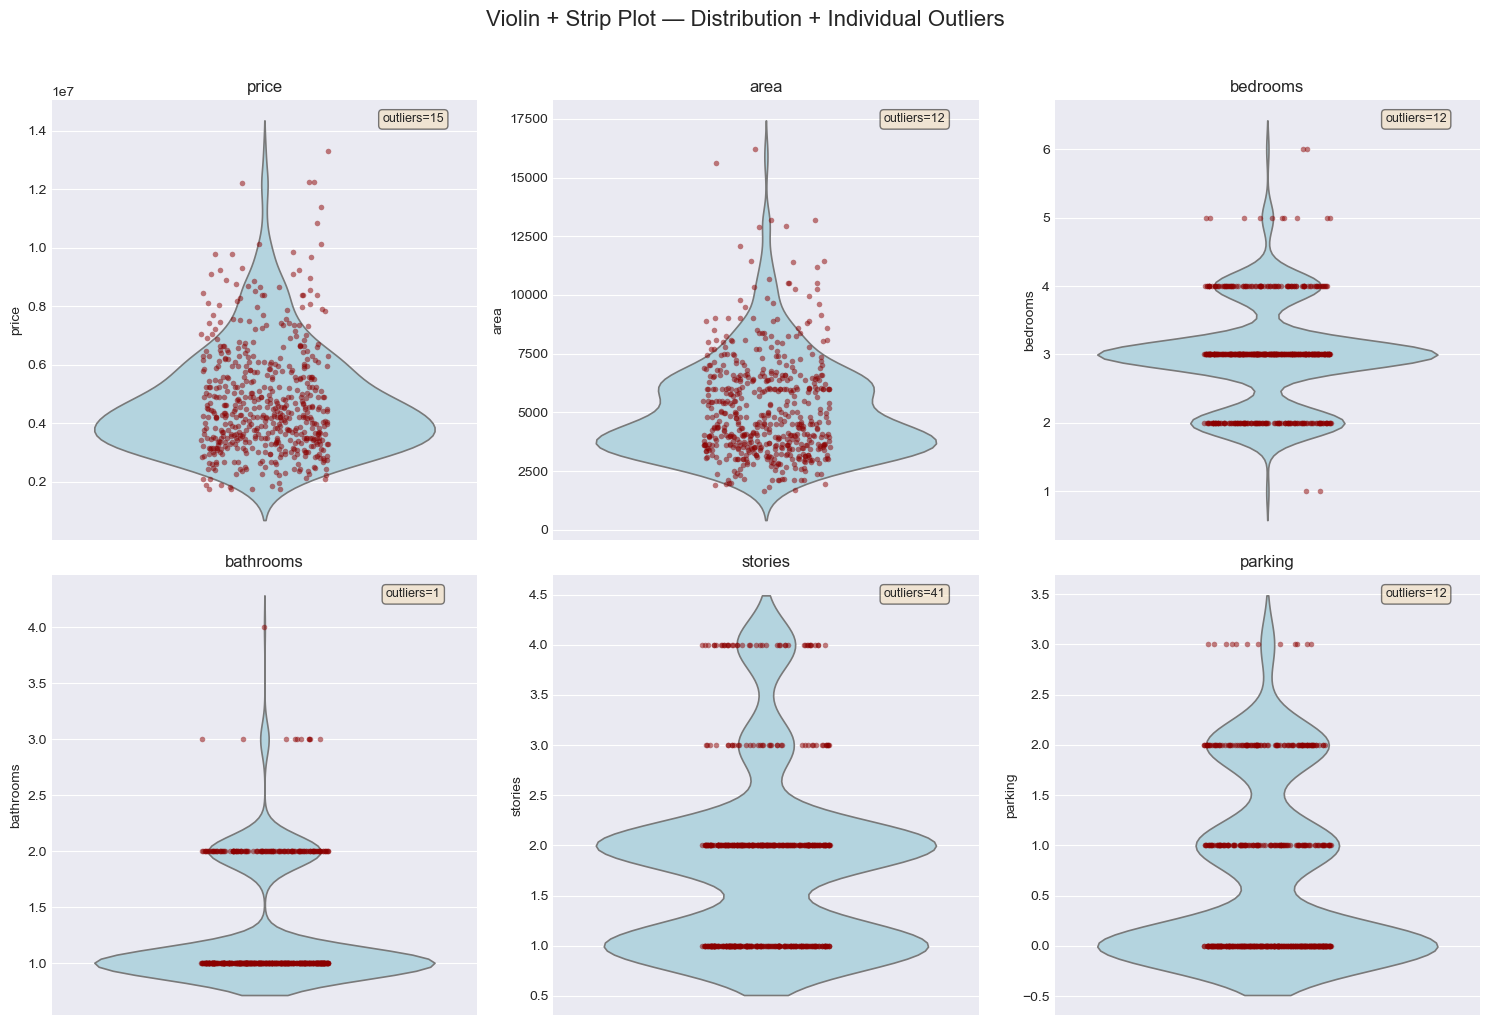

In [13]:
# 3. Violin + Strip plot combination (very modern look) 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(y=df[col], ax=axes[i], inner=None, color='lightblue', linewidth=1.2)
    sns.stripplot(y=df[col], ax=axes[i], color='darkred', alpha=0.5, size=4, jitter=0.15)
    axes[i].set_title(col)
    axes[i].set_ylabel(col)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).sum()
    axes[i].text(0.85,0.95,f'outliers={outliers}',transform=axes[i].transAxes,ha='center',fontsize=9,bbox=dict(boxstyle='round',facecolor='wheat',alpha=0.5))
plt.suptitle("Individual Boxplots — Clear Outlier View", fontsize=16, y=1.02)

plt.suptitle("Violin + Strip Plot — Distribution + Individual Outliers", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [14]:
# Function to detect outliers using IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    return outliers, lower_bound, upper_bound
important_cols = [ 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

print("Outlier Detection using IQR Method:\n" + "="*50)

for col in important_cols:
    outliers, low, high = find_outliers_iqr(df, col)
    print(f"{col}:")
    print(f"  → Lower bound: {low:,.2f} | Upper bound: {high:,.2f}")
    print(f"  → Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  → Outlier values sample: {sorted(outliers.head(6).tolist())}\n")
    else:
        print("  → No outliers detected\n")

Outlier Detection using IQR Method:
area:
  → Lower bound: -540.00 | Upper bound: 10,500.00
  → Number of outliers: 12 (2.20%)
  → Outlier values sample: [11175, 11440, 12090, 13200, 13200, 16200]

bedrooms:
  → Lower bound: 0.50 | Upper bound: 4.50
  → Number of outliers: 12 (2.20%)
  → Outlier values sample: [5, 5, 5, 5, 5, 6]

bathrooms:
  → Lower bound: -0.50 | Upper bound: 3.50
  → Number of outliers: 1 (0.18%)
  → Outlier values sample: [4]

stories:
  → Lower bound: -0.50 | Upper bound: 3.50
  → Number of outliers: 41 (7.52%)
  → Outlier values sample: [4, 4, 4, 4, 4, 4]

parking:
  → Lower bound: -1.50 | Upper bound: 2.50
  → Number of outliers: 12 (2.20%)
  → Outlier values sample: [3, 3, 3, 3, 3, 3]



In [15]:
outlier_summary = []

for col in important_cols:
    outliers_iqr, low, high = find_outliers_iqr(df, col)
    
    
    outlier_summary.append({
        'Column': col,
        'IQR Outliers': len(outliers_iqr),
        'Min Value': df[col].min(),
        'Max Value': df[col].max(),
        'Mean': df[col].mean(),
        'Median': df[col].median()
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df.style.format({
    'Min Value': '{:,.0f}',
    'Max Value': '{:,.0f}',
    'Mean': '{:,.0f}',
    'Median': '{:,.0f}'
}).background_gradient(cmap='OrRd', subset=['IQR Outliers']))

,Column,IQR Outliers,Min Value,Max Value,Mean,Median
0,area,12,"1,650","16,200","5,151","4,600"
1,bedrooms,12,1,6,3,3
2,bathrooms,1,1,4,1,1
3,stories,41,1,4,2,2
4,parking,12,0,3,1,0


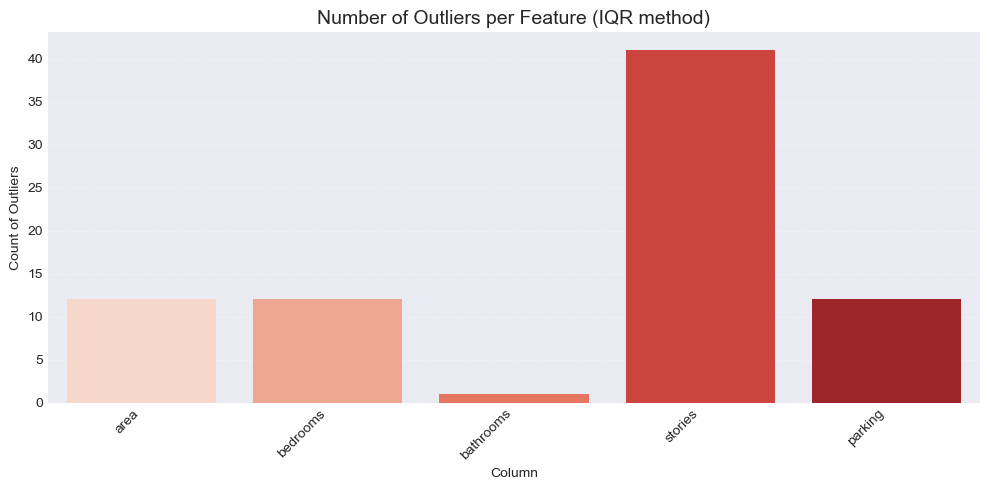

In [16]:
# Bar plot of outlier counts
plt.figure(figsize=(10, 5))
sns.barplot(x=outlier_df ['Column'], y=outlier_df ['IQR Outliers'], palette='Reds')
plt.title("Number of Outliers per Feature (IQR method)", fontsize=14)
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, column, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    
    return df

for col in important_cols:
    df = cap_outliers_iqr(df, col, iqr_factor=1.5)
    

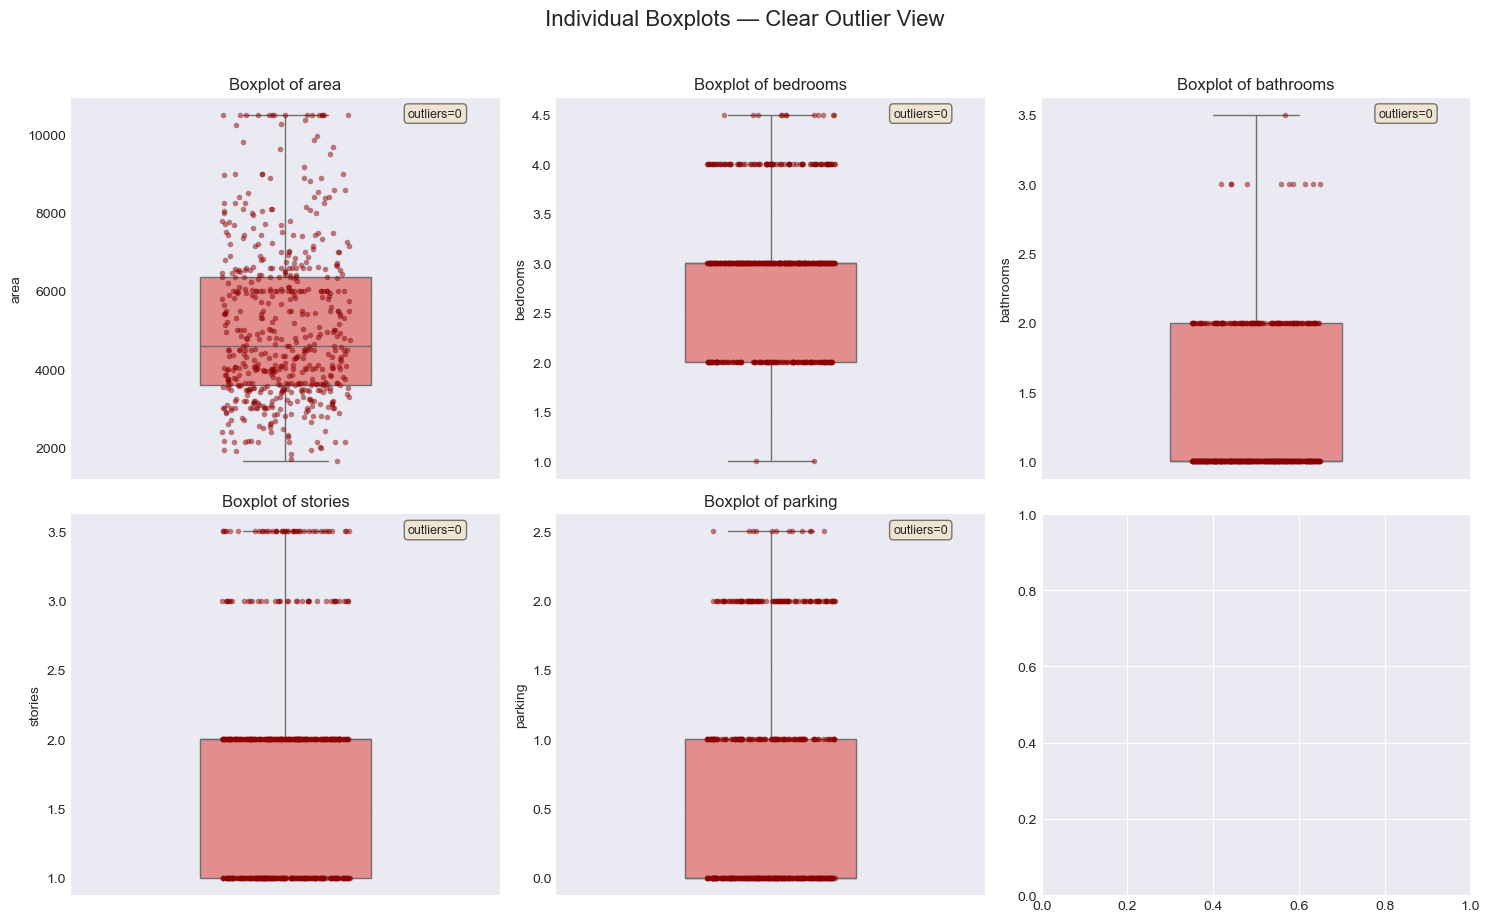

In [18]:
# Function to plot boxplot and stripplot after capping outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(df[important_cols]):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral', width=0.4)
    sns.stripplot(y=df[col], ax=axes[i], color='darkred', alpha=0.5, size=4, jitter=0.15)
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    outliers = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).sum()
    axes[i].text(0.85,0.95,f'outliers={outliers}',transform=axes[i].transAxes,ha='center',fontsize=9,bbox=dict(boxstyle='round',facecolor='wheat',alpha=0.5))

plt.suptitle("Individual Boxplots — Clear Outlier View", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Feature Engineering

Original shape: (545, 13)

New engineered features:
['price_log', 'area_per_room', 'area_per_bedroom', 'area_per_bathroom', 'small_house', 'large_house', 'total_rooms', 'bed_bath_ratio', 'bath_per_bedroom', 'amenity_score', 'luxury_score', 'stories_parking', 'has_parking', 'high_parking', 'furnishing_score', 'area_x_aircon', 'area_x_prefarea', 'area_x_luxury', 'bedrooms_x_aircon', 'log_area', 'log_parking', 'area_bin', 'price_bin']

Shape after feature engineering: (545, 36)


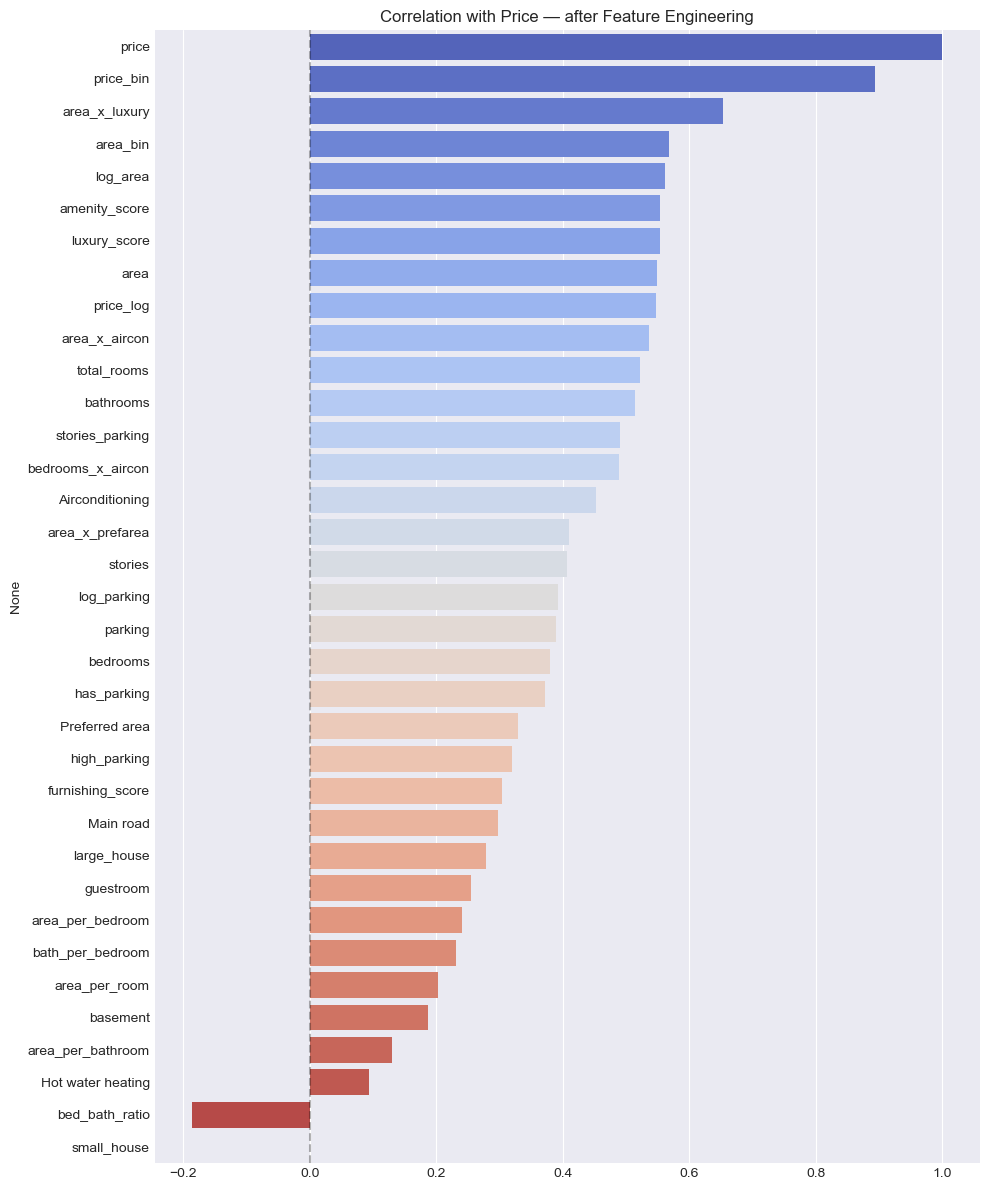

In [19]:
df_fe = df.copy()

print("Original shape:", df.shape)

# 1. Target Transformation (almost always done in house price problems) 
def get_logprice(area):
    if area <= 3450:
        return 14.375  + (area / 3450) * 0.8125          
    elif area > 3450 & area <= 4050:
        return 15.238 + ((area-3450)/(4050-3450)) * (16.0195 - 15.7125)
    elif area > 4050 & area <= 5400:
        return 15.476+ ((area-4050)/(5400-4050)) * (16.068 - 16.0895)
    elif area > 5400 & area <= 6600:
        return 15.722 + ((area-5400)/(6600-5400)) * (16.25 - 16.068)
    elif area > 6600:
        return 16.25 + ((area-6600)/1000) * 0.1

# Vectorized version
df_fe ['price_log'] = np.vectorize(get_logprice)(df_fe['area'])         # log1p = log(1 + x) handles 0 safely
# We usually model price_log and then reverse with np.expm1(pred) at the end

# 2. Area-based features 
df_fe['area_per_room'] = df_fe['area'] / (df_fe['bedrooms'] + df_fe['bathrooms'].clip(lower=1))
# Avoid division by zero — at least 1 bathroom assumed

df_fe['area_per_bedroom'] = df_fe['area'] / df_fe['bedrooms'].clip(lower=1)
df_fe['area_per_bathroom'] = df_fe['area'] / df_fe['bathrooms'].clip(lower=1)

# Sometimes very useful in Indian/Asian real-estate context
df_fe['small_house'] = (df_fe['area'] < 1000).astype(int)          # <1000 sqft
df_fe['large_house'] = (df_fe['area'] > 3000).astype(int)

# 3. Total rooms & space quality indicators
df_fe['total_rooms']      = df_fe['bedrooms'] + df_fe['bathrooms']
df_fe['bed_bath_ratio']   = df_fe['bedrooms'] / df_fe['bathrooms'].clip(lower=1)
df_fe['bath_per_bedroom'] = df_fe['bathrooms'] / df_fe['bedrooms'].clip(lower=1)

# 4. Amenity / Luxury score 
amenity_cols = ['Main road', 'guestroom', 'basement', 'Hot water heating', 
                'Airconditioning', 'Preferred area']


df_fe['amenity_score'] = df_fe[amenity_cols].sum(axis=1)

# Weighted version (domain knowledge — airconditioning & prefarea usually matter more)
df_fe['luxury_score'] = (
    df_fe['Airconditioning'] +
    df_fe['Preferred area']  +
    df_fe['guestroom']      +
    df_fe['basement']         +
    df_fe['Hot water heating']  +
    df_fe['Main road']   
)

# 5. Stories & parking interaction 
df_fe['stories_parking'] = df_fe['stories'] * df_fe['parking']
df_fe['has_parking']     = (df_fe['parking'] > 0).astype(int)
df_fe['high_parking']    = (df_fe['parking'] >= 2).astype(int)

# 6. Furnishing status encoding (ordinal is often better than one-hot) 
furnish_map = {
    'unfurnished':     0,
    'semi-furnished':  1,
    'furnished':       2
}
df_fe['furnishing_score'] = df_fe['Furnishing status'].map(furnish_map)

# 7. Interaction features (non-linear patterns)
df_fe['area_x_aircon']      = df_fe['area'] * df_fe['Airconditioning']
df_fe['area_x_prefarea']    = df_fe['area'] * df_fe['Preferred area']
df_fe['area_x_luxury']      = df_fe['area'] * df_fe['luxury_score']
df_fe['bedrooms_x_aircon']  = df_fe['bedrooms'] * df_fe['Airconditioning']

# 8. Log / sqrt transformations for skewed numeric features 
for col in ['area', 'parking']:
    df_fe[f'log_{col}']  = np.log1p(df_fe[col])
    # df_fe[f'sqrt_{col}'] = np.sqrt(df_fe[col])   # optional — try both

# 9. Binning (sometimes helps tree-based models) 
df_fe['area_bin'] = pd.qcut(df_fe['area'], q=5, labels=False, duplicates='drop')
df_fe['price_bin'] = pd.qcut(df_fe['price'], q=5, labels=False)   # only for EDA — don't leak!

# 10. Final check 
new_features = [col for col in df_fe.columns if col not in df.columns]

print("\nNew engineered features:")
print(new_features)

print("\nShape after feature engineering:", df_fe.shape)

# ─── Quick correlation view with target (log price) ─────────────────────────
plt.figure(figsize=(10, 12))
corr = df_fe.corr(numeric_only=True)['price'].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title("Correlation with Price — after Feature Engineering")
plt.axvline(x=0, color='black', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# ─── Save / prepare for modeling ────────────────────────────────────────────
# features_to_model = [col for col in df_fe.columns if col not in ['price', 'price_log', 'price_bin']]
# X = df_fe[features_to_model]
# y = df_fe['price_log']



In [20]:
#columns of feature engineered data
df_fe.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'Main road',
       'guestroom', 'basement', 'Hot water heating', 'Airconditioning',
       'parking', 'Preferred area', 'Furnishing status', 'price_log',
       'area_per_room', 'area_per_bedroom', 'area_per_bathroom', 'small_house',
       'large_house', 'total_rooms', 'bed_bath_ratio', 'bath_per_bedroom',
       'amenity_score', 'luxury_score', 'stories_parking', 'has_parking',
       'high_parking', 'furnishing_score', 'area_x_aircon', 'area_x_prefarea',
       'area_x_luxury', 'bedrooms_x_aircon', 'log_area', 'log_parking',
       'area_bin', 'price_bin'],
      dtype='object')

In [21]:
#Type of feature engineered data
df_fe.dtypes

price                  int64
area                   int64
bedrooms             float64
bathrooms            float64
stories              float64
Main road              int64
guestroom              int64
basement               int64
Hot water heating      int64
Airconditioning        int64
parking              float64
Preferred area         int64
Furnishing status     object
price_log            float64
area_per_room        float64
area_per_bedroom     float64
area_per_bathroom    float64
small_house            int64
large_house            int64
total_rooms          float64
bed_bath_ratio       float64
bath_per_bedroom     float64
amenity_score          int64
luxury_score           int64
stories_parking      float64
has_parking            int64
high_parking           int64
furnishing_score       int64
area_x_aircon          int64
area_x_prefarea        int64
area_x_luxury          int64
bedrooms_x_aircon    float64
log_area             float64
log_parking          float64
area_bin      

In [22]:
# save the feature engineered data as csv
df_fe.to_csv(r'F:\Project\Hosue price Prediction\New folder (2)\Housing_Price_Data_Feature_Engineered.csv', index=False)

In [23]:
#spliting the dataset to x and y 
x=df_fe.drop(['price', 'Furnishing status','bed_bath_ratio','area_bin'], axis=1)
y=df_fe['price']

In [24]:
x.dtypes

area                   int64
bedrooms             float64
bathrooms            float64
stories              float64
Main road              int64
guestroom              int64
basement               int64
Hot water heating      int64
Airconditioning        int64
parking              float64
Preferred area         int64
price_log            float64
area_per_room        float64
area_per_bedroom     float64
area_per_bathroom    float64
small_house            int64
large_house            int64
total_rooms          float64
bath_per_bedroom     float64
amenity_score          int64
luxury_score           int64
stories_parking      float64
has_parking            int64
high_parking           int64
furnishing_score       int64
area_x_aircon          int64
area_x_prefarea        int64
area_x_luxury          int64
bedrooms_x_aircon    float64
log_area             float64
log_parking          float64
price_bin              int64
dtype: object

In [25]:
x.head()

,area,bedrooms,bathrooms,stories,Main road,guestroom,basement,Hot water heating,Airconditioning,parking,...,has_parking,high_parking,furnishing_score,area_x_aircon,area_x_prefarea,area_x_luxury,bedrooms_x_aircon,log_area,log_parking,price_bin
0,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,...,1,1,2,7420,7420,22260,4.0,8.912069,1.098612,4
1,8960,4.0,3.5,3.5,1,0,0,0,1,2.5,...,1,1,2,8960,0,17920,4.0,9.100637,1.252763,4
2,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,...,1,1,1,0,9960,29880,0.0,9.206433,1.098612,4
3,7500,4.0,2.0,2.0,1,0,1,0,1,2.5,...,1,1,2,7500,7500,30000,4.0,8.922792,1.252763,4
4,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,...,1,1,2,7420,0,29680,4.0,8.912069,1.098612,4


In [26]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [27]:
#spliting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=None)
print(f"\n✅ Train-Test Split Complete:")
print(f"   Training set: {x_train.shape[0]:,} samples ({x_train.shape[0]/len(df)*100:.0f}%)")
print(f"   Test set: {x_test.shape[0]:,} samples ({x_test.shape[0]/len(df)*100:.0f}%)")


✅ Train-Test Split Complete:
   Training set: 436 samples (80%)
   Test set: 109 samples (20%)


In [28]:
#Feature Scaling
scaler=RobustScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [29]:
# DataFrame the scaled features
x_train_sc=pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc=pd.DataFrame(x_test_sc, columns=x_test.columns)

In [30]:
x_test_sc

,area,bedrooms,bathrooms,stories,Main road,guestroom,basement,Hot water heating,Airconditioning,parking,...,has_parking,high_parking,furnishing_score,area_x_aircon,area_x_prefarea,area_x_luxury,bedrooms_x_aircon,log_area,log_parking,price_bin
0,0.507246,1.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,-0.5,0.000000,0.0,-0.176808,0.000000,0.475983,1.000000,0.0
1,0.724638,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.5,1.555024,6500.0,0.918178,1.000000,0.646174,0.000000,1.0
2,-0.166667,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,-0.326563,0.000000,-0.189477,0.000000,-0.5
3,0.181159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.196172,0.0,0.153298,1.000000,0.185137,0.000000,1.0
4,-0.195652,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.000000,0.0,-0.333005,0.000000,-0.224620,0.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.543478,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.000000,0.0,0.314325,0.000000,0.505518,1.584963,1.0
105,0.880435,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.5,0.000000,0.0,-0.651839,0.000000,0.758742,1.000000,-0.5
106,0.543478,1.0,1.0,1.5,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.435407,0.0,0.314325,1.333333,0.505518,1.000000,1.0
107,0.543478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.435407,0.0,0.797407,1.000000,0.505518,1.000000,1.0


In [31]:
#dimentionality reduction
pca = PCA(n_components=15)         
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_.round(3)}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

PCA explained variance ratio: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Total variance explained: 1.000


In [32]:
x_train_pca

array([[-1.38788490e+03,  2.16121223e+00,  2.00880263e+00, ...,
         2.79721056e-01,  1.57289133e-01,  1.05832452e-01],
       [-1.38788421e+03,  3.56293354e+00,  1.33333007e+00, ...,
         9.48180916e-02, -1.58017018e-01, -4.11888832e-01],
       [-1.38788512e+03,  9.58222057e-01, -3.06523423e-01, ...,
         1.77478955e-01,  2.59339199e-01, -4.64581164e-01],
       ...,
       [-1.38788549e+03,  4.30544459e-01,  1.80271036e+00, ...,
         4.91310718e-01,  7.19825021e-02,  2.71260326e-01],
       [-1.38788587e+03, -1.15261458e+00, -1.95867543e+00, ...,
        -6.13072709e-02,  7.16874305e-02,  1.87955506e-01],
       [-1.38788480e+03,  2.02361195e+00,  2.29920977e+00, ...,
        -1.30204136e-02, -5.57676322e-02,  9.51179744e-02]])

In [33]:
x_test_pca

array([[-1.38788538e+03,  6.57569956e-01,  1.81194884e+00, ...,
         5.34641011e-01,  3.66404246e-01,  6.43874740e-03],
       [ 5.11211481e+03, -7.41932251e-01,  1.22973208e+00, ...,
         6.20111580e-03,  8.34781308e-02, -4.15429716e-01],
       [-1.38788581e+03, -1.03015425e+00, -1.85377075e+00, ...,
        -2.37352420e-01,  1.13456275e-01,  1.82187832e-01],
       ...,
       [-1.38788491e+03,  2.00950847e+00,  3.07583734e+00, ...,
         4.05572356e-01,  4.25601531e-02,  2.10431587e-01],
       [-1.38788469e+03,  2.05338002e+00,  1.56049251e+00, ...,
        -6.62577155e-02, -2.22435248e-01,  1.38982099e-01],
       [ 4.71211489e+03, -9.86914389e-02,  1.20740548e+00, ...,
         4.17158973e-04,  1.48528238e-01, -4.48478809e-01]])

In [34]:
# Function to evaluate model
def evaluate_model(model,x_train1,X_test1,y_train1,y_test1):
    model.fit(x_train1,y_train1)
    y_pred = model.predict(X_test1)
    
    Metrics={ 'mae': mean_absolute_error(y_test1, y_pred),
              'rmse':np.sqrt(mean_squared_error(y_test1, y_pred)),
              'r2': r2_score(y_test1, y_pred)}
    print(Metrics)


    return Metrics
print('🚀 Start Model building')

🚀 Start Model building


In [35]:
# ─── Model 1: Linear Regression (Simple baseline, good for interpretability) ─
lr_pipeline = Pipeline(steps=[('model', LinearRegression())])
lr_pipeline_pca= Pipeline(steps=[('model', LinearRegression())])

lr_metrics= evaluate_model(lr_pipeline, x_train_sc, x_test_sc, y_train, y_test)
lr_metrics1= evaluate_model(lr_pipeline_pca, x_train_pca, x_test_pca, y_train, y_test)


{'mae': 600340.0275503861, 'rmse': np.float64(970342.814351831), 'r2': 0.8137200332625032}
{'mae': 556604.6223430713, 'rmse': np.float64(948141.1100885662), 'r2': 0.8221467858147957}


In [36]:
# ─── Model 2: Random Forest (Ensemble, handles non-linearity well) ──────────
rf_pipeline = Pipeline(steps=[ ('model', RandomForestRegressor(random_state=42))])
rf_pipeline1= Pipeline(steps=[ ('model', RandomForestRegressor(random_state=42))])
# Hyperparameter tuning (small grid for demo)
rf_param_grid = {
    'model__n_estimators': [10,30,50,100, 200,300],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5],
    'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__max_features': ['sqrt', 'log2', None],
    'model__bootstrap': [True, False]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid1= GridSearchCV(rf_pipeline1, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


rf_metrics= evaluate_model(rf_grid, x_train_sc, x_test_sc, y_train, y_test)
rf_metrics1= evaluate_model(rf_grid1, x_train_pca, x_test_pca, y_train, y_test)

print("\nRandom Forest Best Parameters:", rf_grid.best_params_)


{'mae': 482886.3944954128, 'rmse': np.float64(873841.1803972534), 'r2': 0.8489291133884225}
{'mae': 739039.970795107, 'rmse': np.float64(1179273.0174377882), 'r2': 0.7248658576545874}

Random Forest Best Parameters: {'model__bootstrap': True, 'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}


In [37]:
# ─── Model 3: XGBoost (Gradient boosting, often best for regression like house prices) ─

xgb_pipeline = Pipeline(steps=[('model', XGBRegressor( random_state=42))])
xgb_pipeline_pca= Pipeline(steps=[('model', XGBRegressor( random_state=42))])
xgb_param_grid = {
    'model__n_estimators': [10, 30, 50, 100, 200, 300],
    'model__max_depth': [10, 20],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.5, 0.8, 1.0],
    'model__colsample_bytree': [0.5, 0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid1 = GridSearchCV(xgb_pipeline_pca, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



xgb_metrics= evaluate_model(xgb_grid, x_train_sc, x_test_sc, y_train, y_test)
xgb_metrics1= evaluate_model(xgb_grid1, x_train_pca, x_test_pca, y_train, y_test)
print("\nXGBoost Best Parameters:", xgb_grid.best_params_)

{'mae': 472300.71875, 'rmse': np.float64(888729.6530936728), 'r2': 0.8437373638153076}
{'mae': 626229.1875, 'rmse': np.float64(1037736.6633207097), 'r2': 0.7869458198547363}

XGBoost Best Parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 10, 'model__n_estimators': 300, 'model__subsample': 0.8}


In [38]:
# ─── Model 4: LightGBM (Gradient boosting, similar to XGBoost, but faster and more memory efficient) ─
lgb_pipeline = Pipeline(steps=[('model', LGBMRegressor( objective='regression',metric='rmse',random_state=42, verbosity=-1 ))])
lgb_pipeline_pca= Pipeline(steps=[('model', LGBMRegressor( objective='regression',metric='rmse',random_state=42, verbosity=-1 ))])

lgb_param_grid = {
    'model__n_estimators': [10, 30, 50, 100, 200, 300],
    'model__learning_rate': [0.1,0.2,0.5,0.7,1.0],
    'model__max_depth': [5,10, 20],
    'model__num_leaves': [31,40,50],
    'model__subsample': [0.3,0.5, 0.8, 1.0],
    'model__colsample_bytree': [0.5, 0.8, 1.0],
    'model__min_split_gain': [ 0.1, 0.2, 0.3]
}

lgb_grid = GridSearchCV(lgb_pipeline, lgb_param_grid, cv=5,scoring='neg_root_mean_squared_error', n_jobs=-1)
lgb_grid1 = GridSearchCV(lgb_pipeline_pca, lgb_param_grid, cv=5,scoring='neg_root_mean_squared_error', n_jobs=-1)


Lgbm_metrics=evaluate_model(lgb_grid, x_train_sc, x_test_sc, y_train, y_test)
Lgbm_metrics1= evaluate_model(lgb_grid1, x_train_pca, x_test_pca, y_train, y_test)

print("\nLightGBM Best Params:", lgb_grid.best_params_)

  File "c:\Users\watersprinter\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\watersprinter\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\watersprinter\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\watersp

{'mae': 485159.2511551974, 'rmse': np.float64(834056.8261828059), 'r2': 0.8623719217666155}
{'mae': 671764.2051440205, 'rmse': np.float64(1086534.1931571914), 'r2': 0.7664377987920976}

LightGBM Best Params: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__min_split_gain': 0.1, 'model__n_estimators': 30, 'model__num_leaves': 31, 'model__subsample': 0.3}


In [39]:
#Model5:Ridge Regression
ridge_pipe = Pipeline(steps=[
    ('regressor', Ridge(random_state=42))
])
ridge_pipe_pca= Pipeline(steps=[
    ('regressor', Ridge(random_state=42))
])
ridge_params = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0],
    'regressor__fit_intercept': [True, False],
    'regressor__max_iter': [200,500,1000, 2000, 5000],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']

}

ridge_search = GridSearchCV(ridge_pipe,ridge_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

ridge_search1 = GridSearchCV(ridge_pipe_pca,ridge_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)




# Evaluate on test set
ridge_metrics=evaluate_model(ridge_search, x_train_sc, x_test_sc, y_train, y_test)
ridge_metrics1=evaluate_model(ridge_search1, x_train_pca, x_test_pca, y_train, y_test)

print("\nBest Ridge Parameters:", ridge_search.best_params_)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
{'mae': 574467.577239472, 'rmse': np.float64(956358.9865884), 'r2': 0.819050390705897}
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
{'mae': 555918.6400196819, 'rmse': np.float64(948964.6655667928), 'r2': 0.8218376849856122}

Best Ridge Parameters: {'regressor__alpha': 1.0, 'regressor__fit_intercept': True, 'regressor__max_iter': 200, 'regressor__solver': 'auto'}


In [40]:
#model6:Lasso Regression
lasso_pipe = Pipeline(steps=[
    ('regressor', Lasso(random_state=42))
])
lasso_pipe_pca= Pipeline(steps=[
    ('regressor', Lasso(random_state=42))
])
lasso_params = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0],
    'regressor__fit_intercept': [True, False],
    'regressor__max_iter': [200,500,1000, 2000, 5000],
    'regressor__selection': ['cyclic', 'random']
}

lasso_search = GridSearchCV(
    lasso_pipe,
    lasso_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
lasso_search1 = GridSearchCV(
    lasso_pipe_pca,
    lasso_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)



# Evaluate on test set
lasso_metrics=evaluate_model(lasso_search, x_train_sc, x_test_sc, y_train, y_test)
lasso_metrics1=evaluate_model(lasso_search1, x_train_pca, x_test_pca, y_train, y_test)
print("\nBest Lasso Parameters:", lasso_search.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'mae': 595687.8510268827, 'rmse': np.float64(967260.0761863862), 'r2': 0.8149017603112945}
Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'mae': 556604.2020562936, 'rmse': np.float64(948146.8313902264), 'r2': 0.8221446393938698}

Best Lasso Parameters: {'regressor__alpha': 5.0, 'regressor__fit_intercept': False, 'regressor__max_iter': 5000, 'regressor__selection': 'random'}


In [41]:
#Model7-ElasticNet Regression
en_pipeline = Pipeline([
    ('model', ElasticNet(random_state=42))
])
en_pipeline1 = Pipeline([
    ('model', ElasticNet(random_state=42))
])
en_param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0],
    'model__fit_intercept': [True, False],
    'model__max_iter': [200,500,1000, 2000, 5000],
    'model__selection': ['cyclic', 'random'],
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

en_grid = GridSearchCV(en_pipeline, en_param_grid, cv=5,
                        scoring='neg_root_mean_squared_error', n_jobs=-1)
en_grid1 = GridSearchCV(en_pipeline1, en_param_grid, cv=5,
                        scoring='neg_root_mean_squared_error', n_jobs=-1)


# Evaluate on test set
en_metrics=evaluate_model(en_grid, x_train_sc, x_test_sc, y_train, y_test)
en_metrics1=evaluate_model(en_grid1, x_train_pca, x_test_pca, y_train, y_test)
print("\nElasticNet Best Parameters:", en_grid.best_params_)


{'mae': 567270.3181766203, 'rmse': np.float64(954954.7358088428), 'r2': 0.8195813881307696}
{'mae': 555613.4659056391, 'rmse': np.float64(950067.9619278201), 'r2': 0.8214231698665679}

ElasticNet Best Parameters: {'model__alpha': 0.1, 'model__fit_intercept': True, 'model__l1_ratio': 0.9, 'model__max_iter': 200, 'model__selection': 'cyclic'}


In [42]:
# Model comparision without dimentionality reduction
metrics_df = pd.DataFrame([lr_metrics, rf_metrics, xgb_metrics,ridge_metrics,lasso_metrics,en_metrics,Lgbm_metrics],
                          index=['Linear Regression', 'Random Forest', 'XGBoost','Ridge','Lasso','ElasticNet','LGBM'])

print("\nModel Comparison:")
display(metrics_df)
print('📈XGBoost performed best among all the models.')


Model Comparison:


,mae,rmse,r2
Linear Regression,600340.027550,970342.814352,0.813720
Random Forest,482886.394495,873841.180397,0.848929
XGBoost,472300.718750,888729.653094,0.843737
Ridge,574467.577239,956358.986588,0.819050
Lasso,595687.851027,967260.076186,0.814902
ElasticNet,567270.318177,954954.735809,0.819581
LGBM,485159.251155,834056.826183,0.862372


📈XGBoost performed best among all the models.


In [43]:
# Model comparision with dimentionality reduction
metrics_df = pd.DataFrame([lr_metrics1, rf_metrics1, xgb_metrics1,ridge_metrics1,lasso_metrics1,en_metrics1,Lgbm_metrics1],
                          index=['Linear Regression', 'Random Forest', 'XGBoost','Ridge','Lasso','ElasticNet','LGBM'])

print("\nModel Comparison for PCA:")
display(metrics_df)
print('📈Linear Regression performed best among all the models.')


Model Comparison for PCA:


,mae,rmse,r2
Linear Regression,556604.622343,9.481411e+05,0.822147
Random Forest,739039.970795,1.179273e+06,0.724866
XGBoost,626229.187500,1.037737e+06,0.786946
Ridge,555918.640020,9.489647e+05,0.821838
Lasso,556604.202056,9.481468e+05,0.822145
ElasticNet,555613.465906,9.500680e+05,0.821423
LGBM,671764.205144,1.086534e+06,0.766438


📈Linear Regression performed best among all the models.


## Sample Data Prediction

In [44]:
Data=[[7420,4,2,3,'yes','no','no','no','yes',2,'yes','furnished'],
      [8960,4,4,4,'yes','no','no','no','yes',3,'no','furnished'],
      [9960,3,2,2,'yes','no','yes','no','no',2,'yes','semi-furnished'],
      [7500,4,2,2,'yes','no','yes','no','yes',3,'yes','furnished'],
      [7420,4,1,2,'yes','yes','yes','no','yes',2,'no','furnished'],
      [3500,4,2,2,'yes','no','no','no','no',2,'no','furnished'],
      [3850,3,1,2,'yes','no','no','no','no',0,'no','unfurnished']]
Data=pd.DataFrame(Data,columns=['area','bedrooms','bathrooms','stories','Main road','guestroom','basement','Hot water heating','Airconditioning','parking','Preferred area','Furnishing status'])
print(Data)

   area  bedrooms  bathrooms  stories Main road guestroom basement  \
0  7420         4          2        3       yes        no       no   
1  8960         4          4        4       yes        no       no   
2  9960         3          2        2       yes        no      yes   
3  7500         4          2        2       yes        no      yes   
4  7420         4          1        2       yes       yes      yes   
5  3500         4          2        2       yes        no       no   
6  3850         3          1        2       yes        no       no   

  Hot water heating Airconditioning  parking Preferred area Furnishing status  
0                no             yes        2            yes         furnished  
1                no             yes        3             no         furnished  
2                no              no        2            yes    semi-furnished  
3                no             yes        3            yes         furnished  
4                no             yes    

In [45]:
binary_cols1= ['Main road', 'guestroom', 'basement', 'Hot water heating', 'Airconditioning', 'Preferred area']
for col in binary_cols1:
    if Data[col].dtype == 'object':
        Data[col] = Data[col].map({'yes': 1, 'no': 0})

Data1 = Data.copy()

def get_logprice(area):
    if area <= 3450:
        return 14.375  + (area / 3450) * 0.8125          
    elif area > 3450 & area <= 4050:
        return 15.238 + ((area-3450)/(4050-3450)) * (16.0195 - 15.7125)
    elif area > 4050 & area <= 5400:
        return 15.476+ ((area-4050)/(5400-4050)) * (16.068 - 16.0895)
    elif area > 5400 & area <= 6600:
        return 15.722 + ((area-5400)/(6600-5400)) * (16.25 - 16.068)
    elif area > 6600:
        return 16.25 + ((area-6600)/1000) * 0.1

# Vectorized version
Data1['price_log'] = np.vectorize(get_logprice)(Data1['area'])

Data1['area_per_room'] = Data1['area'] / (Data1['bedrooms'] + Data1['bathrooms'].clip(lower=1)) 
Data1['area_per_bedroom'] = Data1['area'] / Data1['bedrooms'].clip(lower=1)
Data1['area_per_bathroom'] = Data1['area'] / Data1['bathrooms'].clip(lower=1)
Data1['small_house'] = (Data1['area'] < 1000).astype(int)         
Data1['large_house'] = (Data1['area'] > 3000).astype(int)
Data1['total_rooms']      = Data1['bedrooms'] + Data1['bathrooms']
Data1['bed_bath_ratio']   = Data1['bedrooms'] / Data1['bathrooms'].clip(lower=1)
Data1['bath_per_bedroom'] = Data1['bathrooms'] / Data1['bedrooms'].clip(lower=1)
amenity_cols = ['Main road', 'guestroom', 'basement', 'Hot water heating', 
                'Airconditioning', 'Preferred area']
Data1['amenity_score'] = Data1[amenity_cols].sum(axis=1)

Data1['luxury_score'] = (
    Data1['Airconditioning'] +
    Data1['Preferred area']  +
    Data1['guestroom']      +
    Data1['basement']         +
    Data1['Hot water heating']  +
    Data1['Main road']   
)

Data1['stories_parking'] = Data1['stories'] * Data1['parking']
Data1['has_parking']     = (Data1['parking'] > 0).astype(int)
Data1['high_parking']    = (Data1['parking'] >= 2).astype(int)

furnish_map = {
    'unfurnished':     0,
    'semi-furnished':  1,
    'furnished':       2
}

Data1['furnishing_score'] = Data1['Furnishing status'].map(furnish_map)

Data1['area_x_aircon']      = Data1['area'] * Data1['Airconditioning']
Data1['area_x_prefarea']    = Data1['area'] * Data1['Preferred area']
Data1['area_x_luxury']      = Data1['area'] * Data1['luxury_score']
Data1['bedrooms_x_aircon']  = Data1['bedrooms'] * Data1['Airconditioning']


for col in ['area', 'parking']:
    Data1[f'log_{col}']  = np.log1p(Data1[col])

Data1['area_bin'] = pd.qcut(Data1['area'], q=5, labels=False, duplicates='drop')


conditions_bin = [
    Data1['area'] <= 3450,
    (Data1['area'] > 3450) & (Data1['area'] <= 4050),
    (Data1['area'] > 4050) & (Data1['area'] <= 5400),
    (Data1['area'] > 5400) & (Data1['area'] <= 6600),
    Data1['area'] > 6600
]

choices_bin = [0, 1, 2, 3, 4]

Data1['price_bin'] = np.select(conditions_bin, choices_bin,default=np.nan)
Data1.drop(['Furnishing status','bed_bath_ratio','area_bin'], axis=1, inplace=True)
Data1.head(10)



,area,bedrooms,bathrooms,stories,Main road,guestroom,basement,Hot water heating,Airconditioning,parking,...,has_parking,high_parking,furnishing_score,area_x_aircon,area_x_prefarea,area_x_luxury,bedrooms_x_aircon,log_area,log_parking,price_bin
0,7420,4,2,3,1,0,0,0,1,2,...,1,1,2,7420,7420,22260,4,8.912069,1.098612,4.0
1,8960,4,4,4,1,0,0,0,1,3,...,1,1,2,8960,0,17920,4,9.100637,1.386294,4.0
2,9960,3,2,2,1,0,1,0,0,2,...,1,1,1,0,9960,29880,0,9.206433,1.098612,4.0
3,7500,4,2,2,1,0,1,0,1,3,...,1,1,2,7500,7500,30000,4,8.922792,1.386294,4.0
4,7420,4,1,2,1,1,1,0,1,2,...,1,1,2,7420,0,29680,4,8.912069,1.098612,4.0
5,3500,4,2,2,1,0,0,0,0,2,...,1,1,2,0,0,3500,0,8.160804,1.098612,1.0
6,3850,3,1,2,1,0,0,0,0,0,...,0,0,0,0,0,3850,0,8.256088,0.000000,1.0


In [46]:
Data1.price_log

0    17.269317
1    18.057283
2    18.568950
3    17.310250
4    17.269317
5    15.263583
6    15.442667
Name: price_log, dtype: float64

In [ ]:
#sample prediciton without PCA model
Data1_sc=scaler.transform(Data1)
single=lgb_grid.predict(Data1_sc)
print(single.reshape(-1,1).astype(int))


[[8669349]
 [8848867]
 [8362146]
 [8962278]
 [8718134]
 [3710708]
 [3573357]]


In [ ]:
#sample prediciton with PCA model
Data1_sc1=scaler.transform(Data1)
Data_pca=pca.transform(Data1_sc1)
single1=lasso_search1.predict(Data_pca)
print(single1.reshape(-1,1).astype(int))

[[8219776]
 [9852255]
 [7652643]
 [8134245]
 [7131674]
 [4274602]
 [3366926]]
